## **Projeto GRUPO 4 - Estatística**

Prof° Gabriel

**Participantes:**

* Amanda
* Daniel Custodio
* Márcia
* Mariah Moreira

### **_Resumo:_**

A análise busca identificar a distribuição salarial entre diversos níveis correlacionando com o tipo de moeda o ano em que foi aplicado, sendo que a função principal está atrelada a área de ciência de dados.

_fonte:_

Kaggle - Data Science Salaries 2023 💸

>Salários de diferentes áreas de ciência de dados no domínio da ciência de dados;

### _Estrutura da consulta_
**10 colunas:**
1. Ano
2. Nivel_Experiencia
3. Tipo_Emprego
4. Cargo,Salario
5. Moeda
6. Salario_USD
7. País_Residencia
8. Trabalho_Remoto
9. País_Empregador
10. Tamanho_Empresa


https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick # Biblioteca para formatação do eixo X e Y
import re

Leitura da Base de dados

In [2]:
bd_data = 'ds_salaries.csv'

dados = pd.read_csv(bd_data)
##dados = dados.drop(dados.columns[0], axis=1) #retirando a coluna ID

Análise e Tratamento da Base

In [3]:
dados.shape

(3755, 11)

In [4]:
# Função que cria data frames com base em índices de colunas
def cria_df(lista):
    return dados[dados.columns[lista[0]:lista[1]]].copy()

In [5]:
def renomeia_coluna_df(data_frame, lista_novos_nomes):
    lista_novos_nomes = [nome.lower() for nome in lista_novos_nomes]
    data_frame.columns = lista_novos_nomes
    return data_frame

In [6]:
df_1 = cria_df([0, 12])
df_1.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [7]:
novos_nomes1 = ['Ano','Nivel_Experiencia','Tipo_Emprego','Cargo','Salario','Moeda','Salario_USD','País_Residencia','Trabalho_Remoto','País_Empregador','Tamanho_Empresa']

renomeia_coluna_df(df_1,novos_nomes1)
df_1.head()

,ano,nivel_experiencia,tipo_emprego,cargo,salario,moeda,salario_usd,país_residencia,trabalho_remoto,país_empregador,tamanho_empresa
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ano                3755 non-null   int64 
 1   nivel_experiencia  3755 non-null   object
 2   tipo_emprego       3755 non-null   object
 3   cargo              3755 non-null   object
 4   salario            3755 non-null   int64 
 5   moeda              3755 non-null   object
 6   salario_usd        3755 non-null   int64 
 7   país_residencia    3755 non-null   object
 8   trabalho_remoto    3755 non-null   int64 
 9   país_empregador    3755 non-null   object
 10  tamanho_empresa    3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [9]:
df_1.isnull().sum()

ano                  0
nivel_experiencia    0
tipo_emprego         0
cargo                0
salario              0
moeda                0
salario_usd          0
país_residencia      0
trabalho_remoto      0
país_empregador      0
tamanho_empresa      0
dtype: int64

In [10]:
df_1.describe()

,ano,salario,salario_usd,trabalho_remoto
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [11]:
num_unique_values = df_1.nunique()

# Crie um novo DataFrame a partir dos resultados
unique_values_df = pd.DataFrame({'Coluna': num_unique_values.index, 'Valores Únicos': num_unique_values.values})

# Visualize o novo DataFrame
print(unique_values_df)

               Coluna  Valores Únicos
0                 ano               4
1   nivel_experiencia               4
2        tipo_emprego               4
3               cargo              93
4             salario             815
5               moeda              20
6         salario_usd            1035
7     país_residencia              78
8     trabalho_remoto               3
9     país_empregador              72
10    tamanho_empresa               3


1) Distribuição da Base por nível de experiencia


In [12]:
tipos_exp = df_1['nivel_experiencia'].unique()
print(tipos_exp)

['SE' 'MI' 'EN' 'EX']


EN = Entry-level / Junior.

MI = Mid-level / Pleno.

SE = Senior-level / Senior.

EX = Executive-level / Diretor.

In [13]:
df_1['nivel_experiencia'] = df_1['nivel_experiencia'].replace('EN','Junior')
df_1['nivel_experiencia'] = df_1['nivel_experiencia'].replace('MI','Pleno')
df_1['nivel_experiencia'] = df_1['nivel_experiencia'].replace('SE','Senior')
df_1['nivel_experiencia'] = df_1['nivel_experiencia'].replace('EX','Diretor')

In [14]:
tipos_exp = df_1['nivel_experiencia'].unique()
print(tipos_exp)

['Senior' 'Pleno' 'Junior' 'Diretor']


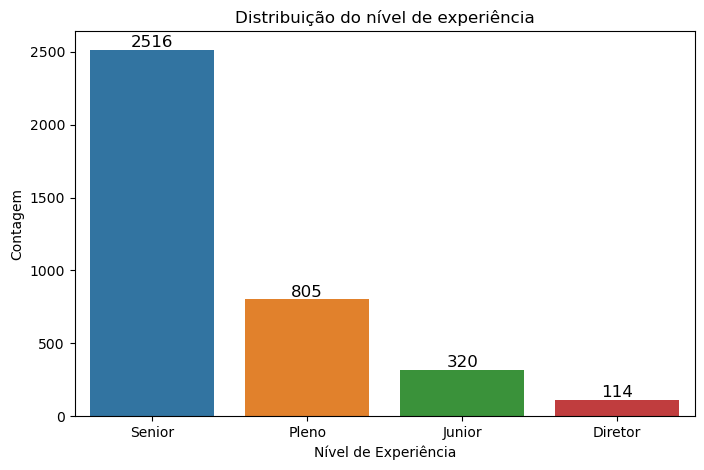

In [15]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_1, x='nivel_experiencia')
plt.title('Distribuição do nível de experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Contagem')

# Adicione números inteiros sobre as barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show() #ou ; no final

- A maior parte da base respondente e composta por pessoas do nível Senior e a menor parte por pessoas com cargo de liderança.

2) Distribuição da Base por tipo de emprego


In [16]:
tipos_emp = df_1['tipo_emprego'].unique()
print(tipos_emp)

['FT' 'CT' 'FL' 'PT']


PT : Part-time / Meio Periodo

FT : Full-time / Tempo Integral

CT : Contract / Contrato

FL : Freelance

In [17]:
df_1['tipo_emprego'] = df_1['tipo_emprego'].replace('PT','Meio Periodo')
df_1['tipo_emprego'] = df_1['tipo_emprego'].replace('FT','Tempo Integral')
df_1['tipo_emprego'] = df_1['tipo_emprego'].replace('CT','Contrato')
df_1['tipo_emprego'] = df_1['tipo_emprego'].replace('FL','Freelance')

In [18]:
tipos_emp = df_1['tipo_emprego'].unique()
print(tipos_emp)

['Tempo Integral' 'Contrato' 'Freelance' 'Meio Periodo']


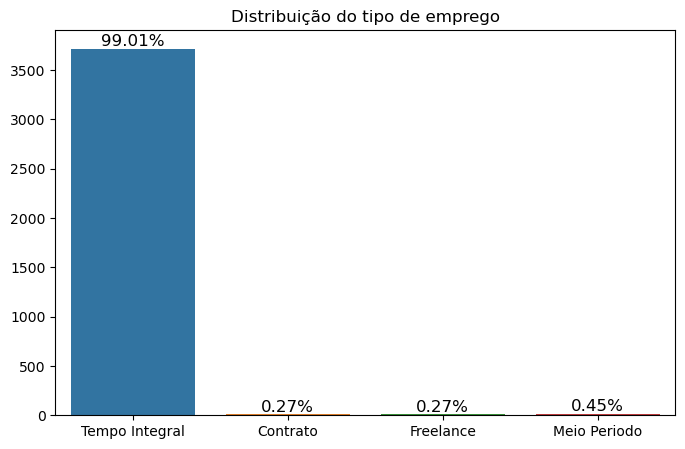

In [19]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_1, x='tipo_emprego')
plt.title('Distribuição do tipo de emprego')
plt.xlabel('')
plt.ylabel('')

# Adicione as porcentagens sobre as barras
total = len(df_1)  # Total de observações
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.2%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points');

- A maior parte dos respondentes trabalham em regime de tempo integral


In [20]:
df_sem_USBR = df_1.loc[df_1['país_empregador'] != 'US']
df_sem_USBR = df_1.loc[df_1['país_empregador'] != 'BR']
print(df_sem_USBR['país_empregador'].unique())

['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH' 'CF' 'FR' 'FI' 'UA'
 'IE' 'IL' 'GH' 'CO' 'SG' 'AU' 'SE' 'SI' 'MX' 'PT' 'RU' 'TH' 'HR' 'VN'
 'EE' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK' 'IT' 'MA' 'PL' 'AL' 'AR'
 'LT' 'AS' 'CR' 'IR' 'BS' 'HU' 'AT' 'SK' 'CZ' 'TR' 'PR' 'DK' 'BO' 'PH'
 'BE' 'ID' 'EG' 'AE' 'LU' 'MY' 'HN' 'JP' 'DZ' 'IQ' 'CN' 'NZ' 'CL' 'MD'
 'MT']


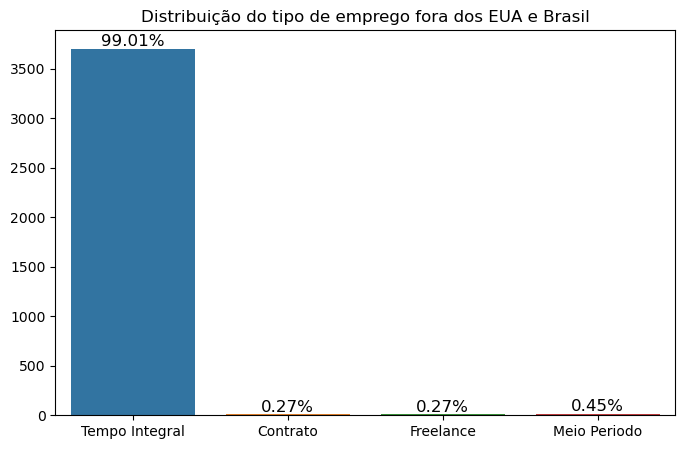

In [21]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_sem_USBR, x='tipo_emprego')
plt.title('Distribuição do tipo de emprego fora dos EUA e Brasil')
plt.xlabel('')
plt.ylabel('')

# Adicione as porcentagens sobre as barras
total = len(df_sem_USBR)  # Total de observações
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.2%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points');

- Para entender melhor a disposição do mercado de trabalho, foi análisado o tipo de emprego desconsiderando os EUA que compões a maior parte dos respondentes.


['BR']


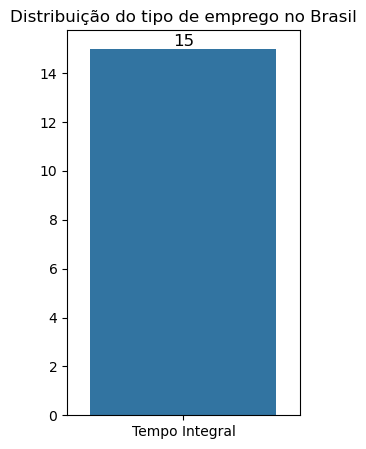

In [22]:
df_BR = df_1.loc[df_1['país_empregador'] == 'BR']
print(df_BR['país_empregador'].unique())

plt.figure(figsize=(3, 5))
ax = sns.countplot(data=df_BR, x='tipo_emprego')
plt.title('Distribuição do tipo de emprego no Brasil')
plt.xlabel('')
plt.ylabel('')

# Adicione os números de contagem acima das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points');

- Também foi analisado o tipo de emprego dos respondentes que residem no Brasil, no entanto a amostra é pequena e 100% da base trabalha em tempo integral

3) Distribuição do Salário em Dolares

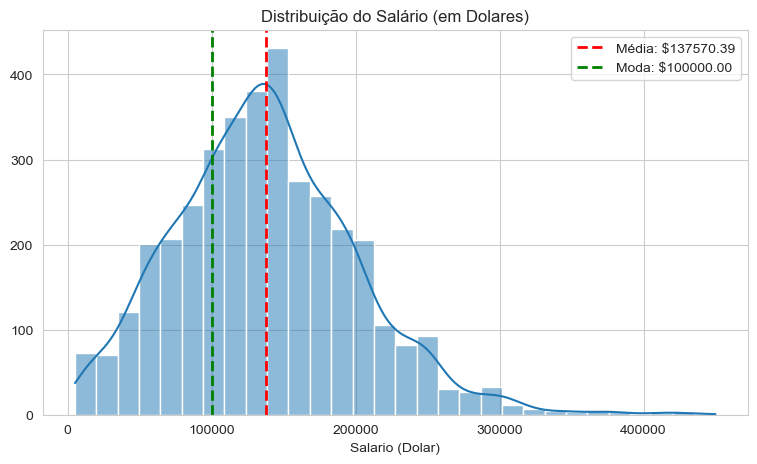

In [23]:
# Estilo
sns.set_style("whitegrid")

plt.figure(figsize=(20, 5))
# Distribuição do Salário em Dolares
plt.subplot(1, 2, 1)
ax = sns.histplot(df_1['salario_usd'], kde=True, bins=30)
plt.title('Distribuição do Salário (em Dolares)')
plt.xlabel('Salario (Dolar)')
plt.ylabel('')

# Calcula a média dos salários
media_salario = df_1['salario_usd'].mean()

# Calcula a moda dos salários
moda_salario = df_1['salario_usd'].mode().iloc[0]

# Adiciona a média no gráfico
plt.axvline(media_salario, color='red', linestyle='dashed', linewidth=2, label=f'Média: ${media_salario:.2f}')
# Adiciona a moda no gráfico
plt.axvline(moda_salario, color='green', linestyle='dashed', linewidth=2, label=f'Moda: ${moda_salario:.2f}')
plt.legend()

- O grafico apresenta uma distribuição normal com maior pico proximo a 140mil e uma pequena amostra com salário superior a 300mil. 

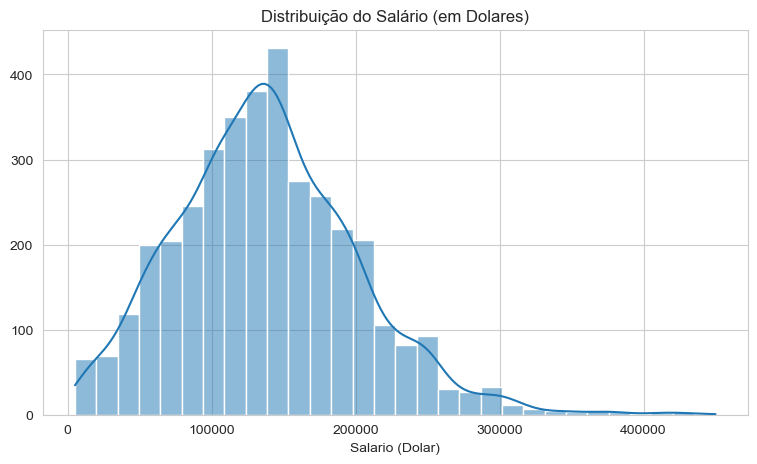

In [24]:
# Estilo
sns.set_style("whitegrid")

plt.figure(figsize=(20, 5))
# Distribuição do Salário em Dolares
plt.subplot(1, 2, 1)
sns.histplot(df_sem_USBR['salario_usd'], kde=True, bins=30)
plt.title('Distribuição do Salário (em Dolares)')
plt.xlabel('Salario (Dolar)')
plt.ylabel('');

- A distribuição do sálario em países além do EUA e BR seguem a mesma linha de tendencia da amostra como um todo

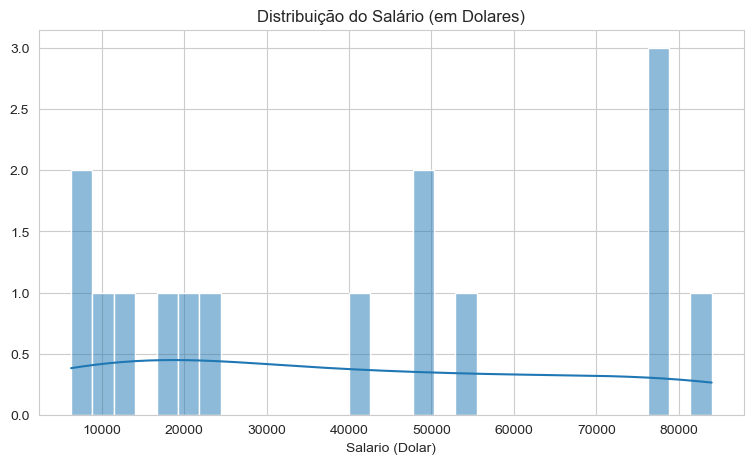

In [25]:
# Estilo
sns.set_style("whitegrid")

plt.figure(figsize=(20, 5))
# Distribuição do Salário em Dolares
plt.subplot(1, 2, 1)
sns.histplot(df_BR['salario_usd'], kde=True, bins=30)
plt.title('Distribuição do Salário (em Dolares)')
plt.xlabel('Salario (Dolar)')
plt.ylabel('');

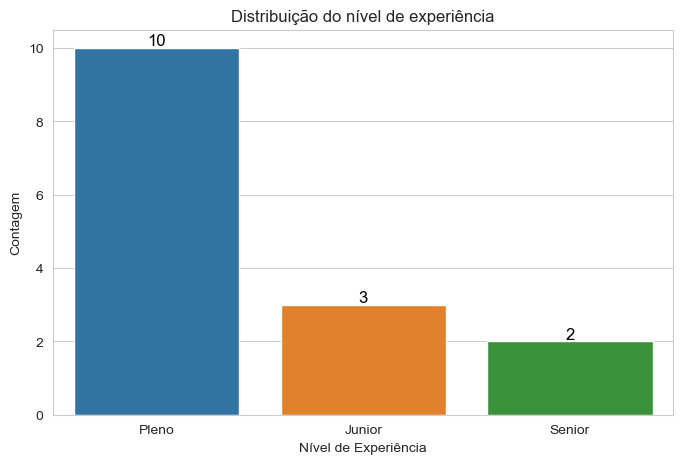

In [26]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_BR, x='nivel_experiencia')
plt.title('Distribuição do nível de experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Contagem')

# Adicione números inteiros sobre as barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

- Como a amostra de respondentes no Brasil é pequena e com cargos espalhados é inválido analisar a distribuição.

4) Média salarial por cargo

In [27]:
count_cargos = df_1['cargo'].value_counts()

top_5_cargos = count_cargos.head(5)
print(top_5_cargos)

Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Name: cargo, dtype: int64


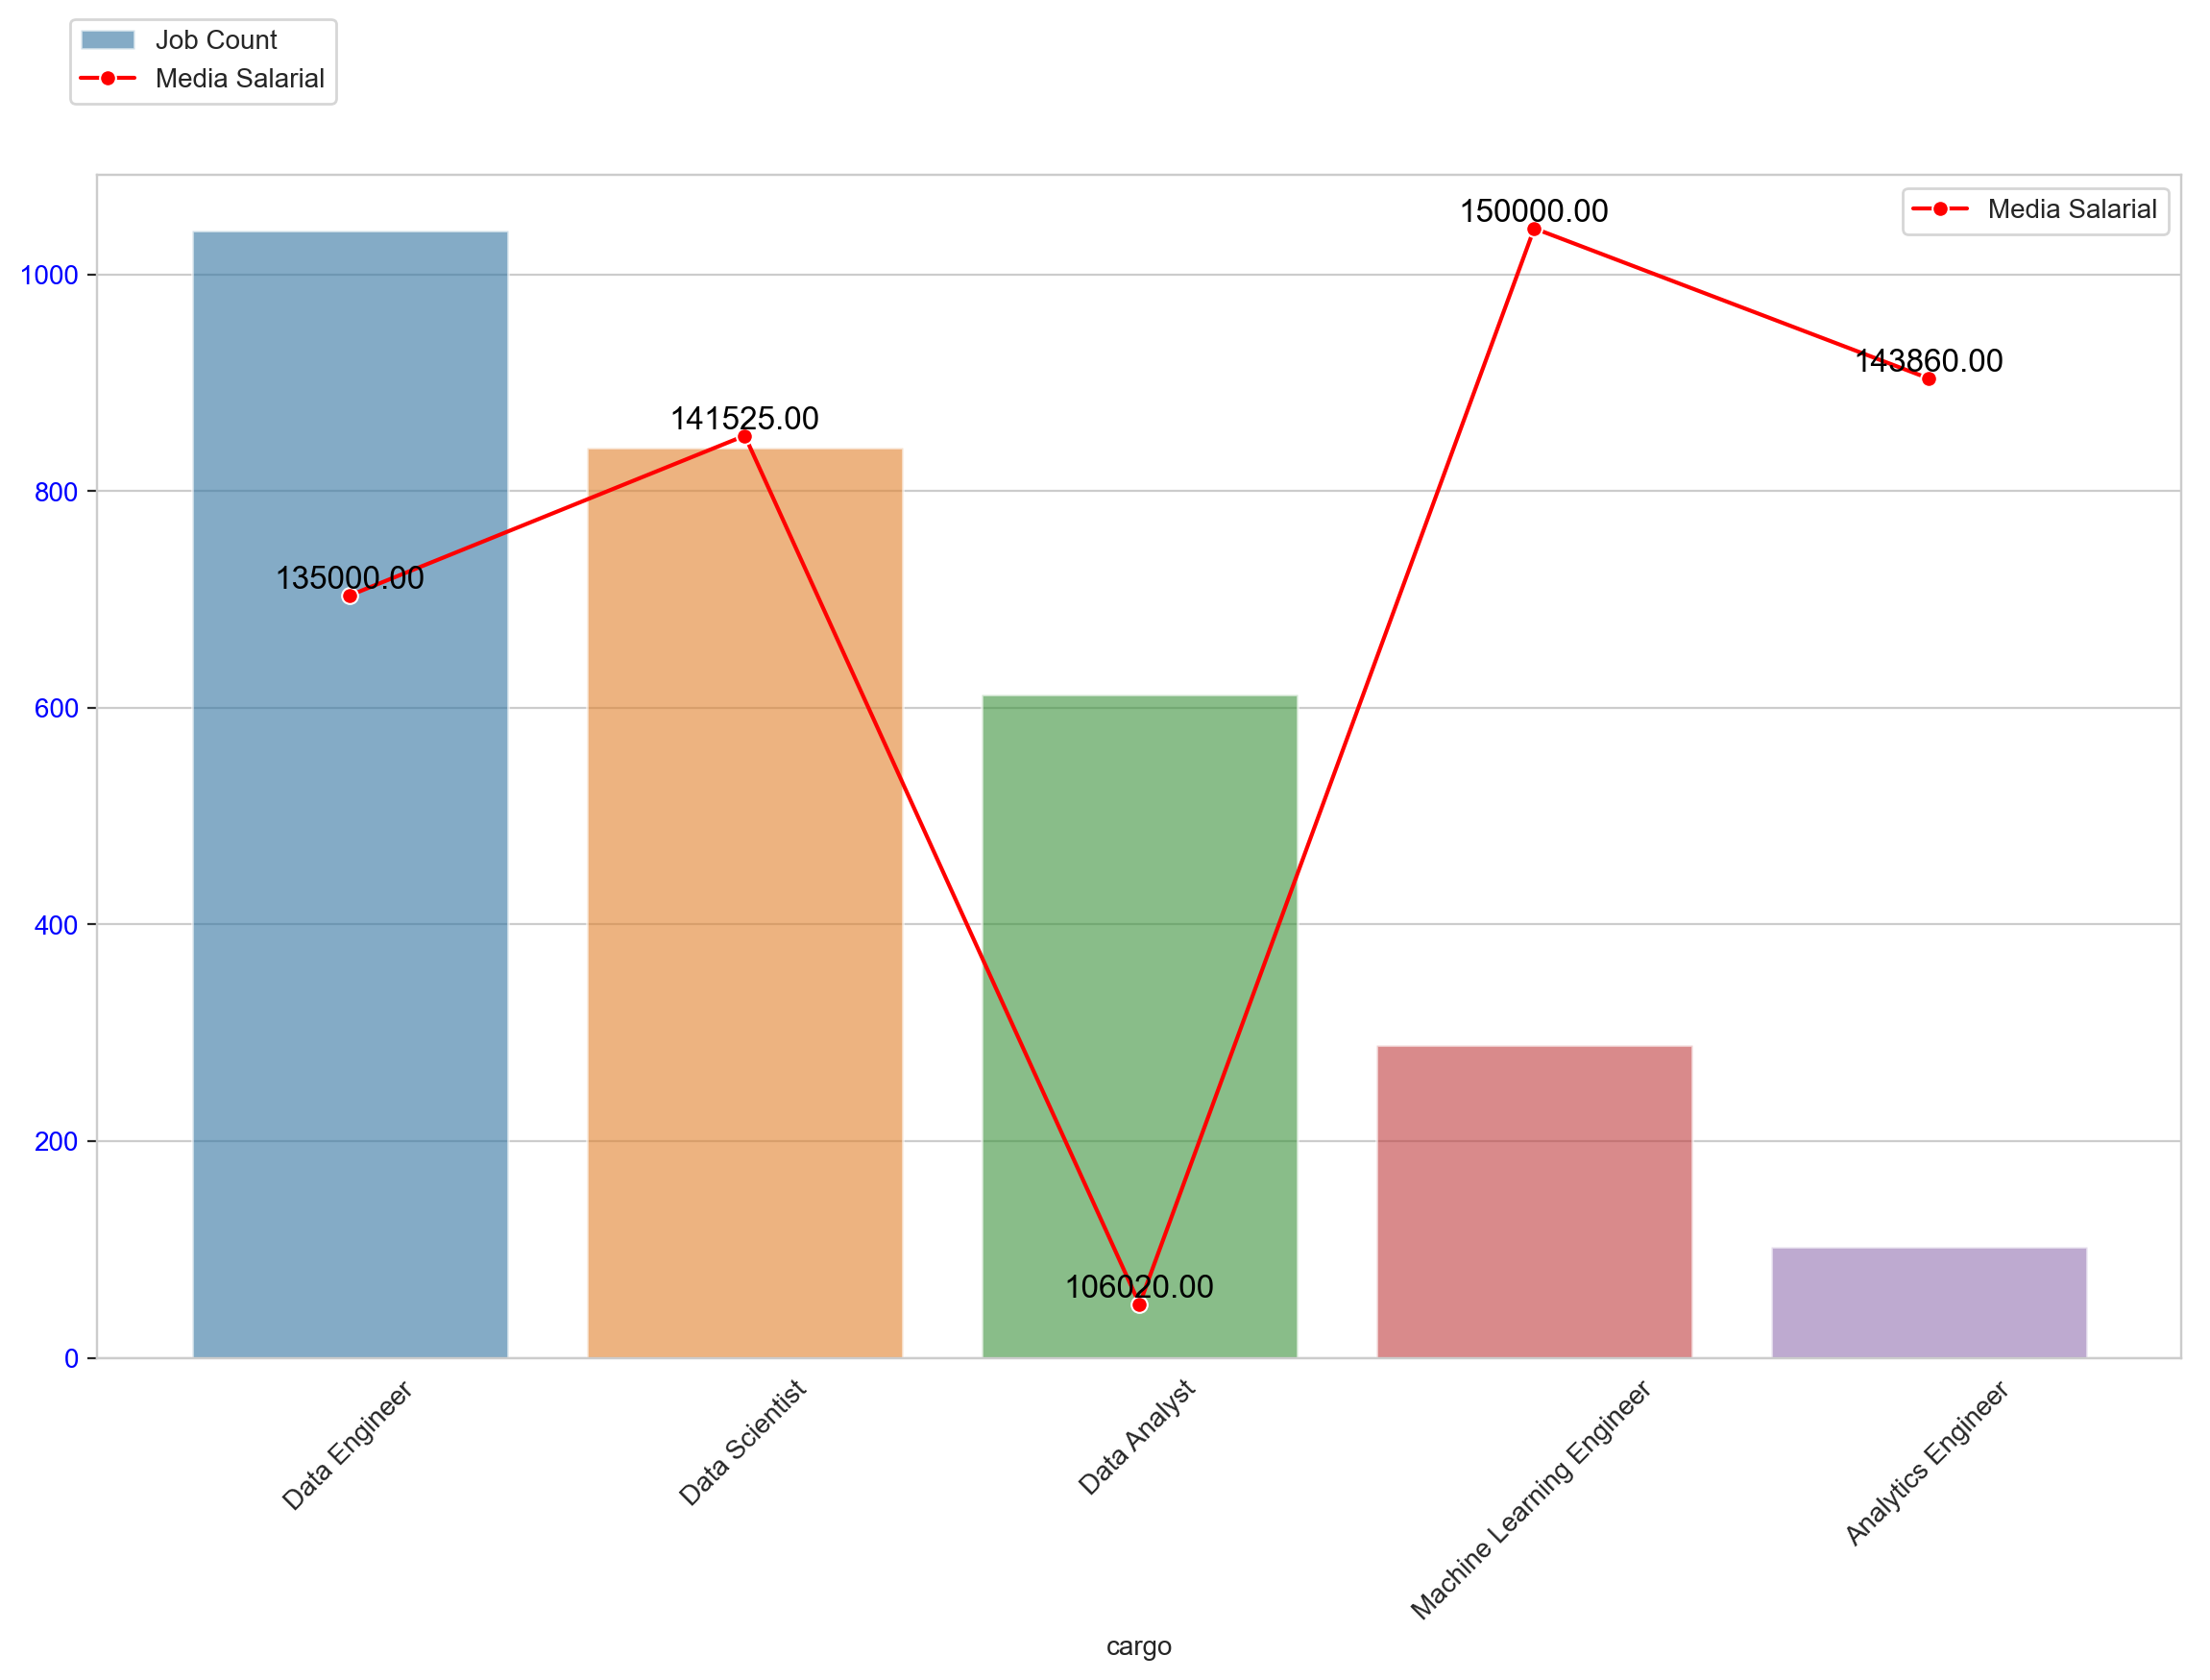

In [28]:
top_5_cargos = df_1['cargo'].value_counts().nlargest(5).reset_index()
top_5_cargos.columns = ['cargo', 'count']
media_salarial = df_1[df_1['cargo'].isin(top_5_cargos['cargo'])].groupby('cargo')['salario_usd'].median().reset_index()
top_5_cargos_salario = pd.merge(top_5_cargos, media_salarial, on='cargo').sort_values('count', ascending=False)



fig, ax1 = plt.subplots(figsize=(14, 8), dpi=200)
sns.barplot(x='cargo', y='count', data=top_5_cargos_salario, ax=ax1, alpha=0.6, label='Job Count')
ax1.set_ylabel('', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Plotar o salário médio
ax2 = ax1.twinx()
sns.lineplot(x='cargo', y='salario_usd', data=top_5_cargos_salario, ax=ax2, color='r', marker='o', label='Media Salarial')
ax2.set_ylabel('', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Remover o eixo Y do segundo eixo
ax2.set_yticks([])

# Adicionar os valores da mediana acima das bolinhas
for index, row in top_5_cargos_salario.iterrows():
    ax2.annotate(f'{row["salario_usd"]:.2f}', (index, row["salario_usd"]),
                 ha='center', va='bottom', fontsize=12, color='black')

fig.legend(loc="upper left", bbox_to_anchor=(0.11,0.99));

- O gráfico apresenta a média sálarial dos TOP5 cargos que mais responderam a pesquisa, para analisar a confiabilidade dos dados também foi considerado o tamanho da amostra (barras).

5) Trabalho Remoto ao longo dos anos

In [29]:
tipos_ano = df_1['ano'].unique()
print(tipos_ano)

[2023 2022 2020 2021]


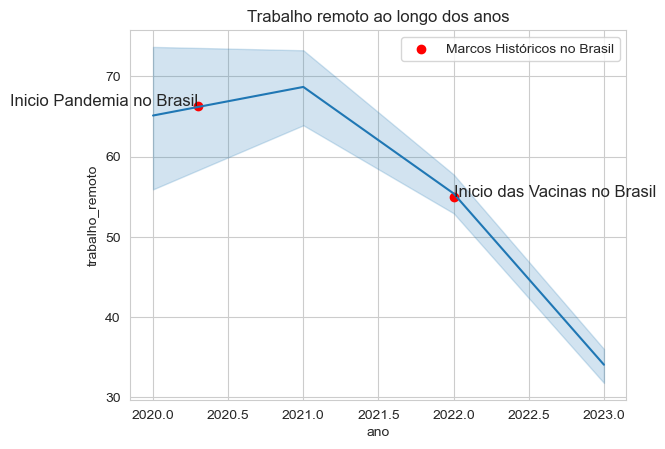

In [30]:

sns.lineplot(x='ano', y='trabalho_remoto', data=df_1)

# Coordenadas e legendas para os pontos que você deseja adicionar
ano1, valor1, legenda1 = 2020.3, 66.3, 'Inicio Pandemia no Brasil'
ano2, valor2, legenda2 = 2022.0, 55, 'Inicio das Vacinas no Brasil'

# Adicione os pontos com legendas
plt.scatter(x=[ano1, ano2], y=[valor1, valor2], color='red', marker='o', label='Marcos Históricos no Brasil')
plt.text(ano1, valor1, f'{legenda1}', fontsize=12, ha='right')
plt.text(ano2, valor2, f'{legenda2}', fontsize=12, ha='left')

plt.title('Trabalho remoto ao longo dos anos')
plt.legend()
plt.show()

- A analise acima foi desenvolvida para tentar estabelecer a correlação com a pandemia (COVID), os dados foram coletados a partir de 2020 quando a crise já havia se estabelecido em alguns países como EUA, por isso notamos a maior concentração de pessoas no modelo remoto em 2020. A vacina começou a ser distribuida no Brasil em meados de 2022, mas fora já havia começado a campanha de vacinação, por isso a queda é evidente antes dessa data.

6) Distribuição salarial com base no tipo de emprego (anual)

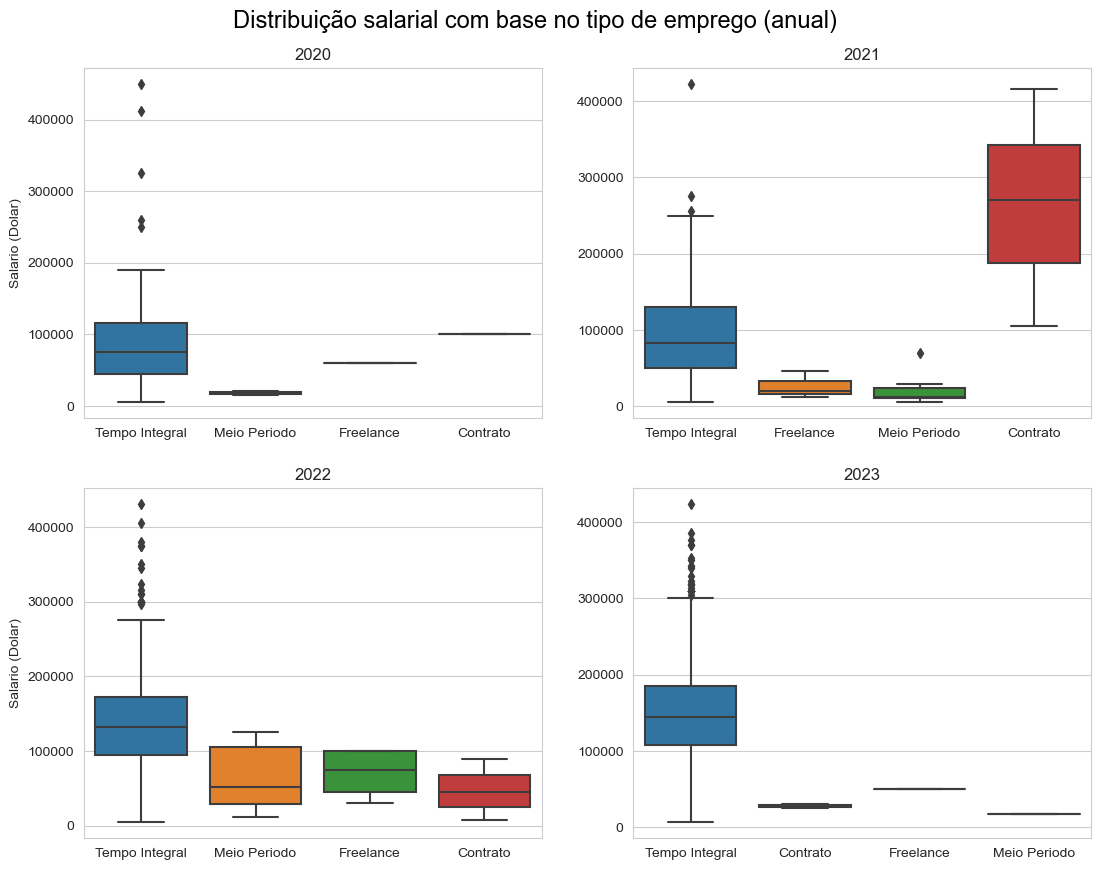

In [31]:
custom_palette = sns.color_palette("tab10")

fig, ax = plt.subplots(2,2, figsize= (13, 10)) 


data20 = df_1.loc[df_1['ano']==2020, ['tipo_emprego', 'salario_usd']]
x20, y20 = data20['tipo_emprego'], data20['salario_usd']
data21 = df_1.loc[df_1['ano']==2021, ['tipo_emprego', 'salario_usd']]
x21, y21 = data21['tipo_emprego'], data21['salario_usd']
data22 = df_1.loc[df_1['ano']==2022, ['tipo_emprego', 'salario_usd']]
x22, y22 = data22['tipo_emprego'], data22['salario_usd']
data23 = df_1.loc[df_1['ano']==2023, ['tipo_emprego', 'salario_usd']]
x23, y23 = data23['tipo_emprego'], data23['salario_usd']

sns.set(rc={'xtick.labelsize':10,
            'ytick.labelsize':10})

plt.gcf().text(.24, .92,       
               "Distribuição salarial com base no tipo de emprego (anual)",   
               fontsize = 17, 
               color='Black')

sns.boxplot(ax=ax[0,0], x=x20, y=y20, palette=custom_palette).set(title=('2020'), xlabel=(''), ylabel=('Salario (Dolar)'))
sns.boxplot(ax=ax[0,1], x=x21, y=y21, palette=custom_palette).set(title=('2021'), xlabel=(''), ylabel=(''))
sns.boxplot(ax=ax[1,0], x=x22, y=y22, palette=custom_palette).set(title=('2022'), xlabel=(''), ylabel=('Salario (Dolar)'))
sns.boxplot(ax=ax[1,1], x=x23, y=y23, palette=custom_palette).set(title=('2023'), xlabel=(''), ylabel=(''))

plt.show() 

- Foi analisado a distribuição salarial por ano, considerando o modelo de trabalho dos respondentes. É possivel notar que no começo da pandemia (2020) muitas pessoas ainda trabalhavam em tempo integral, com o auge da crise o mercado encontrou como saída o modelo de Contrato (2021), no entanto ele apresentava custos muito elevados e foi adpatado para modalidades como freelance e meio periodo (2022), com o fim da pandemia retornamos ao modelo antes ja praticado de tempo integral (2023). 

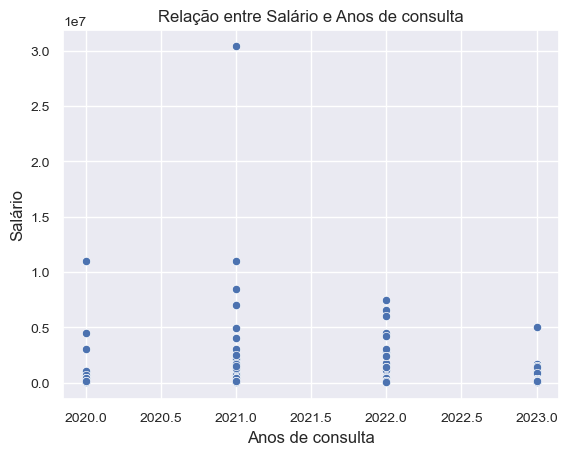

In [34]:
# Gráfico de dispersão entre salário e anos de consulta

sns.scatterplot(x='ano', y='salario', data=df_1)
plt.xlabel('Anos de consulta')
plt.ylabel('Salário')
plt.title('Relação entre Salário e Anos de consulta')
plt.show()


In [69]:
top_5_pais_residencia = (df_1['país_residencia'].value_counts().nlargest(5).reset_index())
print((top_5_pais_residencia/df_1.count())+0)


   ano  cargo index  moeda  nivel_experiencia  país_empregador  \
0  NaN    NaN   NaN    NaN                NaN              NaN   
1  NaN    NaN   NaN    NaN                NaN              NaN   
2  NaN    NaN   NaN    NaN                NaN              NaN   
3  NaN    NaN   NaN    NaN                NaN              NaN   
4  NaN    NaN   NaN    NaN                NaN              NaN   

   país_residencia  salario  salario_usd  tamanho_empresa  tipo_emprego  \
0         0.800000      NaN          NaN              NaN           NaN   
1         0.044474      NaN          NaN              NaN           NaN   
2         0.022636      NaN          NaN              NaN           NaN   
3         0.021305      NaN          NaN              NaN           NaN   
4         0.018908      NaN          NaN              NaN           NaN   

   trabalho_remoto  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
